In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult.data', header=None)
#feature_names = ['age','workclass','fnlwgt']....
#df.columns = feature_names
df.columns = list('ABCDEFGHIJKLMNP')
print(df.head())

    A                  B       C           D   E                    F  \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                    G               H       I        J     K  L   M  \
0        Adm-clerical   Not-in-family   White     Male  2174  0  40   
1     Exec-managerial         Husband   White     Male     0  0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0  0  40   
3   Handlers-cleaners         Husband   Black     Male     0  0  40   
4      Prof-specialty            Wife   Black   Female     0  0  40   

                N       P  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=

In [14]:
#print(df.columns)
#print(df.shape)
#print(df.dtypes)
#print(df.isna())
for c in df.columns:
    print(c, df[c].hasnans)

A False
B False
C False
D False
E False
F False
G False
H False
I False
J False
K False
L False
M False
N False
P False


array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [20]:
# 'abc', '' , '-' 

test_c = df['I']
unique_list = test_c.unique()
#print(unique_list)
for e in unique_list:
    if e == ' Other':
        print(e)

 Other


0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: A, Length: 32561, dtype: int64


(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

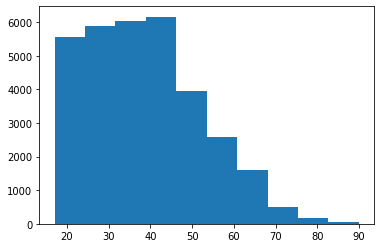

In [23]:
age = df['A']
print(age)

_, axe = plt.subplots()
axe.hist(x = age, bins=10)

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

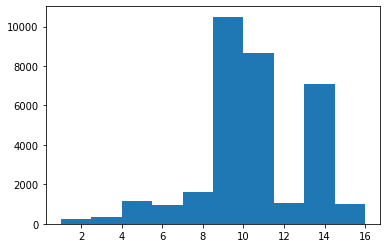

In [24]:
edyears = df['E']

_, axe = plt.subplots()
axe.hist(x = edyears, bins=10)

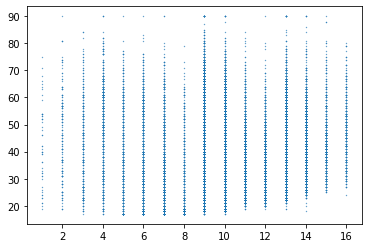

In [27]:
_, axe = plt.subplots()
#axe.scatter(x = age, y = edyears, s = 0.1)
axe.scatter(x = edyears, y = age, s = 0.1)

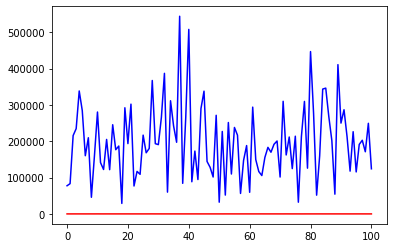

In [35]:
weight = df.loc[:100, 'C']
hour = df.loc[:100, 'M']

_, axe = plt.subplots()
axe.plot(weight, c='b')
axe.plot(hour, c='r')

     weight  hour  weight_std  weight_n  hour_std    hour_n
0     77516    40   -1.168223  0.094388 -0.107785  0.487179
1     83311    13   -1.111477  0.105636 -2.459233  0.141026
2    215646    40    0.184374  0.362495 -0.107785  0.487179
3    234721    40    0.371160  0.399519 -0.107785  0.487179
4    338409    40    1.386494  0.600776 -0.107785  0.487179
..      ...   ...         ...       ...       ...       ...
96   191277    60   -0.054252  0.315196  1.634027  0.743590
97   202683    48    0.057438  0.337334  0.588940  0.589744
98   171095    40   -0.251878  0.276023 -0.107785  0.487179
99   249409    40    0.514988  0.428029 -0.107785  0.487179
100  124191    40   -0.711172  0.184983 -0.107785  0.487179

[101 rows x 6 columns]


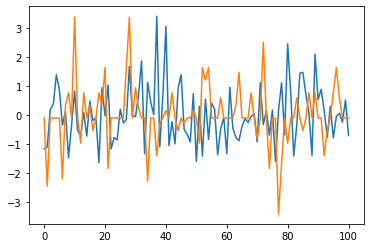

In [42]:
test_df = df.loc[:100,['C','M']]
test_df.columns = ['weight', 'hour']
#print(test_df)

data_mean = test_df['weight'].mean()
data_std = test_df['weight'].std()
data_min = test_df['weight'].min()
data_max = test_df['weight'].max()

# standardization
# (value - mean) / standard-dev
# * gaussian dist. (bell-curve)
test_df['weight_std'] = (test_df['weight']-data_mean)/data_std

# normalization
# (value - min) / (max - min)
# * affected by outliers 
test_df['weight_n'] = (test_df['weight']-data_min)/(data_max-data_min)

################################################

data_mean = test_df['hour'].mean()
data_std = test_df['hour'].std()
data_min = test_df['hour'].min()
data_max = test_df['hour'].max()
test_df['hour_std'] = (test_df['hour']-data_mean)/data_std
test_df['hour_n'] = (test_df['hour']-data_min)/(data_max-data_min)

print(test_df)
_, axe = plt.subplots()
axe.plot(test_df['weight_std'], c='b')
axe.plot(test_df['hour_std'], c='r')